In [7]:
# Import Required Libratries
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

%matplotlib inline

In [68]:
# Define paths to model files
import os
MODELS_DIR = 'models/'
if not os.path.exists(MODELS_DIR):
    os.mkdir(MODELS_DIR)
MODEL_TF = MODELS_DIR + 'model'
MODEL_NO_QUANT_TFLITE = MODELS_DIR + 'model_no_quant.tflite'
MODEL_TFLITE = MODELS_DIR + 'model.tflite'
MODEL_TFLITE_MICRO = MODELS_DIR + 'model.cc'

In [69]:
############################################################
# function: create_onehot_classifier(y)
#   Creates a one hot encoded array between (0,9) 
#
# input: mx1 array of intergers between (0,9), 
#        where m represents the number of training examples
#
# output: mx10 array of one's hot encoded values
############################################################


def create_onehot_classifier(y):
    
    #Create and array zeros array in the shape of the final output
    arr_train = np.zeros((y.shape[0],10),dtype=int) 
    
    i=0 # Inititalize the index
    
    # Interate through each example and write that example to 
    #   the zeros array generated earlier 
    for val in y:
        temp_arr = np.zeros(10)
        temp_arr[0] = 1
        temp_arr = np.roll(temp_arr, val)
        arr_train[i,:] = temp_arr
        i=i+1
    return arr_train

In [70]:
# This block loads the data, and places it in the
#    correct format for training

#Load mnist data

(x_train_read,y_train_read), (x_test_read,y_test_read) = keras.datasets.mnist.load_data()

# Print the shape of data of orginial data
print("Number of training examples: ", x_train_read.shape[0])
print("Number of test examples: ", x_test_read.shape[0])
print("x_train shape: ", x_train_read.shape)
print("y_train shape: ", y_train_read.shape)
print("x_test shape: ", x_test_read.shape)
print("y_test shape: ", y_test_read.shape)


# Unwrape the data the data into a single column for each example
x_train = x_train_read.reshape(x_train_read.shape[0],-1)
x_test = x_test_read.reshape(x_test_read.shape[0],-1)

y_train = create_onehot_classifier(y_train_read)
y_test = create_onehot_classifier(y_test_read)

print("\nFormatted x_train shape:",x_train.shape)
print("Formatted y_train shape:",y_train.shape)
print("Formatted x_test shape:",x_test.shape)
print("Formatted y_test shape:",y_test.shape)


Number of training examples:  60000
Number of test examples:  10000
x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)

Formatted x_train shape: (60000, 784)
Formatted y_train shape: (60000, 10)
Formatted x_test shape: (10000, 784)
Formatted y_test shape: (10000, 10)


The foundation of any AI application is the data provided to the algorithm.  The cell below will load a random sample of the data.

Rerun the cell multiple times to get familiar with the data. 

Number:  1
y_train[15138] = [0 1 0 0 0 0 0 0 0 0]
x_train[15138]:


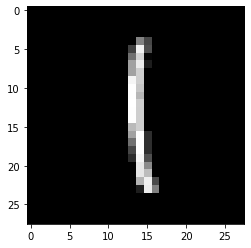

In [71]:
# Explore the Data
# Rerun this cell to load additonal examples

# Integer between 0-59,999
index = np.random.randint(0,59999)
plt.imshow(x_train_read[index], cmap='gray')
str_yout = 'y_train['+str(index)+'] ='
str_xout = 'x_train['+str(index)+']:'
print("Number: ", y_train_read[index])
print(str_yout,y_train[index])
print(str_xout)

In [72]:
# This block contains the function to generate the model
## EDIT VALUES IN THIS BLOCK TO CHANGE PERFORMANCE ##

def create_model():
   
    # Hyper Parameters
    #### EDIT THESE VALUES TO CHANGE PERFOMANCE  #####
    learning_rate = 0.0006 # Learning is highly depdendent on this values
    hidden_layer1_size = 8 # number of neurons in hidden layer 1
    hidden_layer2_size = 4 # number of neurons in hidden layer 2
    #hidden_layer3_size = 2
    
    # Block defining neural network 
    ####  EDIT NUMBER OF LAYERS/NEURONS TO ChANGE PERFORMANCE ###
    
    
    model = keras.Sequential([
        # Define Input Layer/Hidden Layer 1
        keras.layers.Dense(hidden_layer1_size, activation=tf.nn.relu, input_shape = (784,)),
        # Define Hidden Layer 2
        keras.layers.Dense(hidden_layer2_size, activation=tf.nn.relu),
        # Additional Hidden Layers here:
        #keras.layers.Dense(hidden_layer3_size, activation=tf.nn.relu),
        # Define Output layer
        keras.layers.Dense(10, activation=tf.keras.activations.softmax)
    ])

    # By default will use:
    #   Adams Optimizer with learning rate 0.0005
    #       Adams is an algorithm used to update weights/biases during training
    #       There are other optimezers available
    #   Mean Square Error Loss Function
    #   Metrics, which is only provided for information and not used 
    #      for training.  In this example a accuracy is choosen. 
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                  loss=tf.keras.losses.mean_squared_error,
                  metrics=['accuracy'])
    return model

# Load the neural network 
model = create_model()

In [ ]:
# Train the model using the .fit method
# EDIT Epochs, batch_size, inital_epoch
epoch_num = 100
epoch_init = 0
model.fit(x_train, y_train, epochs = epoch_num, batch_size = 64,initial_epoch=epoch_init)

In [74]:
# Evaluate your model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test,verbose = 'False')
print("Test Accuracy = ",  test_acc)

Test Accuracy =  0.8892999887466431


Number:            2
Model Prediction:  2
x_train[15138]:


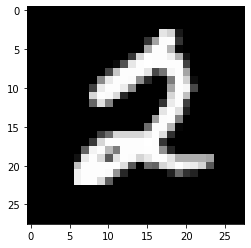

In [75]:
# Let Look at how the model perfromed
# Rerun the model to figure which test cases your model
#    predicted right and which ones it predicted wrong
# 
# Evaluating which data your model does well on which ones
#   need improvemt can focus your data collection and traing efforts 

index = np.random.randint(0,x_train.shape[0])
plt.imshow(x_train_read[index], cmap='gray')

xin = x_train[index].reshape(-1,1)
xin = xin.T
arr_predict = model.predict(xin,verbose = 'False')
# transform array to number
result = np.argmax(arr_predict)

print("Number:           ", y_train_read[index])
print("Model Prediction: ", result)
print(str_xout)

In [76]:
# Run this block to save your model
# This file will be the submission to the programming challenge
### EDIT NAME ###
model.save(MODEL_TF)


INFO:tensorflow:Assets written to: models/model/assets


## Generate a TensorFlow Lite Model

In [77]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_TF)
model_no_quant_tflite = converter.convert()

# Save the model to disk
open(MODEL_NO_QUANT_TFLITE, "wb").write(model_no_quant_tflite)

#Convert the model to the TensorFlow Lite format with quantization

# Generate small representative dataset for quanitzation
# This example use random numbers, should use actualy training data
def representative_dataset():
    for _ in range(100):
      data = np.random.rand(1, 244, 244, 3)
      yield [data.astype(np.float32)]

converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_TF)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset
model_tflite = converter.convert()

# Save the model to disk
open(MODEL_TFLITE, "wb").write(model_tflite)

9104

In [95]:
def predict_tflite(tflite_model, x_test):
  # Prepare the test data
  x_test_ = x_test.copy()
  print(x_test_.shape)
  #x_test_ = x_test_.reshape((x_test.size, 1))
  x_test_ = x_test_.astype(np.float32)

  # Initialize the TFLite interpreter
  interpreter = tf.lite.Interpreter(model_content=tflite_model)
  interpreter.allocate_tensors()

  input_details = interpreter.get_input_details()[0]
  output_details = interpreter.get_output_details()[0]

  # If required, quantize the input layer (from float to integer)
  input_scale, input_zero_point = input_details["quantization"]
  if (input_scale, input_zero_point) != (0.0, 0):
    x_test_ = x_test_ / input_scale + input_zero_point
    x_test_ = x_test_.astype(input_details["dtype"])
  
  # Invoke the interpreter
  y_pred = np.empty(len(x_test_), dtype=output_details["dtype"])
  for i in range(len(x_test_)):
    interpreter.set_tensor(input_details["index"], [x_test_[i]])
    interpreter.invoke()
    y_pred[i] = interpreter.get_tensor(output_details["index"])[0]
  
  # If required, dequantized the output layer (from integer to float)
  output_scale, output_zero_point = output_details["quantization"]
  if (output_scale, output_zero_point) != (0.0, 0):
    y_pred = y_pred.astype(np.float32)
    y_pred = (y_pred - output_zero_point) * output_scale

  return y_pred

def evaluate_tflite(tflite_model, x_test, y_true):
  global model
  y_pred = predict_tflite(tflite_model, x_test)
  loss_function = tf.keras.losses.get(model.loss)
  loss = loss_function(y_true, y_pred).numpy()
  return loss

In [96]:
# Calculate predictions
y_test_pred_tf = model.predict(x_test)
y_test_pred_no_quant_tflite = predict_tflite(model_no_quant_tflite, x_test)
y_test_pred_tflite = predict_tflite(model_tflite, x_test)

(10000, 784)


ValueError: setting an array element with a sequence.

# Compare predictions
plt.clf()
plt.title('Comparison of various models against actual values')
plt.plot(x_test, y_test, 'bo', label='Actual values')
plt.plot(x_test, y_test_pred_tf, 'ro', label='TF predictions')
plt.plot(x_test, y_test_pred_no_quant_tflite, 'bx', label='TFLite predictions')
plt.plot(x_test, y_test_pred_tflite, 'gx', label='TFLite quantized predictions')
plt.legend()
plt.show()

In [44]:
# Calculate loss
loss_tf, _ = model.evaluate(x_test, y_test, verbose=0)
loss_no_quant_tflite = evaluate_tflite(model_no_quant_tflite, x_test, y_test)
loss_tflite = evaluate_tflite(model_tflite, x_test, y_test)

NameError: name 'model_no_quant_tflite' is not defined

In [45]:
# Compare loss
df = pd.DataFrame.from_records(
    [["TensorFlow", loss_tf],
     ["TensorFlow Lite", loss_no_quant_tflite],
     ["TensorFlow Lite Quantized", loss_tflite]],
     columns = ["Model", "Loss/MSE"], index="Model").round(4)
df

NameError: name 'pd' is not defined

In [46]:
# Calculate size
size_tf = os.path.getsize(MODEL_TF)
size_no_quant_tflite = os.path.getsize(MODEL_NO_QUANT_TFLITE)
size_tflite = os.path.getsize(MODEL_TFLITE)

FileNotFoundError: [Errno 2] No such file or directory: 'models/model_no_quant.tflite'

In [47]:
# Convert to a C source file, i.e, a TensorFlow Lite for Microcontrollers model
!xxd -i {MODEL_TFLITE} > {MODEL_TFLITE_MICRO}
# Update variable names
REPLACE_TEXT = MODEL_TFLITE.replace('/', '_').replace('.', '_')
!sed -i 's/'{REPLACE_TEXT}'/g_model/g' {MODEL_TFLITE_MICRO}

# Print the C source file
!cat {MODEL_TFLITE_MICRO}

unsigned char g_model[] = {
  0x24, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x00, 0x00,
  0x00, 0x00, 0x00, 0x00, 0x14, 0x00, 0x20, 0x00, 0x04, 0x00, 0x08, 0x00,
  0x0c, 0x00, 0x10, 0x00, 0x14, 0x00, 0x00, 0x00, 0x18, 0x00, 0x1c, 0x00,
  0x14, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00, 0xfc, 0x22, 0x00, 0x00,
  0x1c, 0x1b, 0x00, 0x00, 0x04, 0x1b, 0x00, 0x00, 0xc4, 0x00, 0x00, 0x00,
  0x8c, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0xa0, 0xdd, 0xff, 0xff, 0x54, 0x00, 0x00, 0x00,
  0x2c, 0x00, 0x00, 0x00, 0x14, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0x05, 0x00, 0x00, 0x00, 0x73, 0x65, 0x72, 0x76, 0x65, 0x00, 0x00, 0x00,
  0x0f, 0x00, 0x00, 0x00, 0x73, 0x65, 0x72, 0x76, 0x69, 0x6e, 0x67, 0x5f,
  0x64, 0x65, 0x66, 0x61, 0x75, 0x6c, 0x74, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0xb8, 0xff, 0xff, 0xff, 0x08, 0x00, 0x00, 0x00,
  0x0a, 0x00, 0x00, 0x00, 0x08, 0x00, 0x00, 0x00, 0x64, 0x65, 0x6e, 0x73,
  0x65, 0x

In [94]:
x_test.size[0]

TypeError: 'int' object is not subscriptable